In [56]:
# All important libraries goes here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [57]:
pd.options.display.float_format = '{:.2f}'.format

In [58]:
dataframe = pd.read_csv('./Data/washedData.csv')
dataframe = dataframe.drop(columns='ID')

clean_data = pd.read_csv('./Data/cleaned-data.csv')


#### Problem Statement
We are trying to understand the factors that influence whether a company has affected employees.

This is important because companies with affected employees may require additional support or interventions.

By identifying the key factors, we can target our interventions more effectively and potentially prevent employees from being affected in the future.

To solve this problem, we will use this dataset to build a predictive model.

This model will take as input the various financial and operational characteristics of a company and output a prediction of whether the company has affected employees.

We can then use this model to predict the status of new companies and guide our interventions.


<br>
<br>

#### (a) Data cleaning


##### (a) (ii) looking if there are missing values in each column of the dataframe

In [59]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No of employee     4137 non-null   int64 
 1   Annual turnover    4129 non-null   object
 2   TCTC               4123 non-null   object
 3   Basic Salary       4135 non-null   object
 4   Cash Injection     4137 non-null   int64 
 5   Contrib Waiver     4137 non-null   int64 
 6   Affected Employee  4137 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 226.4+ KB


From the results it shows that there arent any missing values, since the total entries = Not-Null Count of 4137

<br>

##### (a) (iii) Checking for duplicate rows

In [60]:
dataframe.duplicated().sum()

1075

There are 1075 duplicates in the dataset, Those will be removed

In [61]:
dataframe.drop_duplicates(inplace=True)
dataframe.duplicated().sum()

0

<br>

##### (a) (iv) Ensuring data consistency and removing null values

These attributes may contain some inconsistencies, for the datatype has to be an integer.

 2.   Annual turnover    4129 non-null   object
 3.   TCTC               4123 non-null   object
 4.  Basic Salary       4135 non-null   object

In [62]:
dataframe['Annual turnover'] = pd.to_numeric(dataframe['Annual turnover'], errors='coerce')
dataframe['TCTC'] = pd.to_numeric(dataframe['TCTC'], errors='coerce')
dataframe['Basic Salary'] = pd.to_numeric(dataframe['Basic Salary'], errors='coerce')

dataframe.dropna(inplace=True)

dataframe.head(5)

,No of employee,Annual turnover,TCTC,Basic Salary,Cash Injection,Contrib Waiver,Affected Employee
0,63,3098000000.00,13782989.04,9500520.21,0,1,0
1,73,15000000.00,326574.61,992400.00,1,1,1
2,18,0.00,543629.21,397789.63,0,1,1
3,25,52000000.00,725607.67,496910.00,0,1,1
4,1,765270.60,205385.34,31530.00,0,0,0


<br>

##### (a) (v) Removing outliers

In [63]:
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

for column in ['No of employee', 'Annual turnover', 'TCTC', 'Basic Salary']:
    dataframe = remove_outliers(dataframe, column)

dataframe.to_csv('./Data/cleaned-data.csv', index=False)

<br>
<br>

#### (b) Statistical Analysis

In [64]:
dataframe.describe()

,No of employee,Annual turnover,TCTC,Basic Salary,Cash Injection,Contrib Waiver,Affected Employee
count,1584.00,1584.00,1584.00,1584.00,1584.00,1584.00,1584.00
mean,5.47,525426.92,19281.95,14758.83,0.71,0.70,0.91
std,5.89,1035349.32,27751.99,18020.23,0.45,0.46,0.29
min,1.00,-3000000.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,9600.00,300.00,2000.00,0.00,0.00,1.00
50%,3.00,80000.00,6820.00,6514.25,1.00,1.00,1.00
75%,7.00,480000.00,27380.38,21250.00,1.00,1.00,1.00
max,26.00,6100000.00,153192.00,75800.00,1.00,1.00,1.00


**Number of Employees:**
- The data covers a total of 1,584 businesses.
- On average, each business has approximately 5.47 employees.
- The number of employees varies significantly, ranging from 1 employee to a maximum of 26 employees in a single business.

**Annual Turnover (Revenue):**
- The average annual turnover (revenue) for businesses is approximately 525,426.92 Namibian Dollars.
- The range of annual turnovers is substantial, with some businesses reporting negative turnover (indicating losses) and others earning up to 6,100,000 Namibian Dollars annually.

**Total Compensation for Employees:**
- On average, each employee receives about 19,281.95 Namibian Dollars as total compensation annually.
- The total compensation varies widely among employees, with some receiving no compensation and the highest-earning employee receiving 153,192 Namibian Dollars annually.

**Basic Salary:**
- The average basic salary for employees is around 14,758.83 Namibian Dollars.
- The range of basic salaries is extensive, with some employees not receiving any basic salary and others receiving up to 75,800 Namibian Dollars.

**Cash Injection:**
- On average, businesses received cash injections or financial support about 71% of the time. This suggests that many businesses received external financial assistance.

**Contribution Waiver:**
- Businesses applied contribution waivers approximately 70% of the time. This indicates that a significant portion of businesses waived certain contributions.

**Affected Employees:**
- On average, about 91% of businesses reported that their employees were affected by certain conditions or changes in the business.


<br>
<br>

#### (c) Exploratory Data Analysis (EDA)


##### (c) (i) Employment distribution

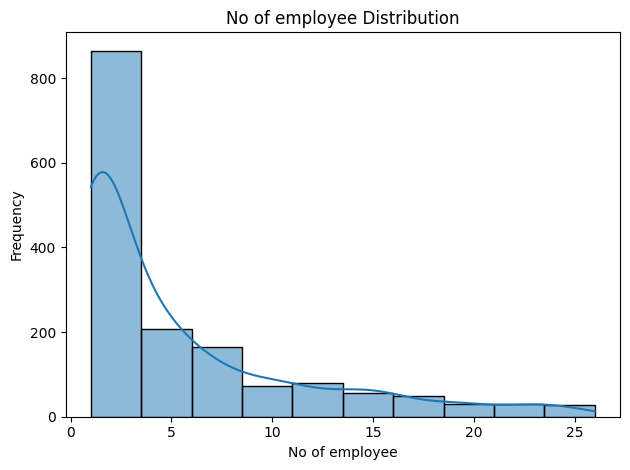

In [65]:
data = clean_data['No of employee']

sns.histplot(data, kde=True, bins=10)
plt.title("No of employee Distribution")
plt.xlabel("No of employee")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Most companies have fewer than 10 employees, with a significant number having just 1 employee.

The distribution is right-skewed, meaning there are a few companies with a large number of employees.
<br>


##### (c) (iii) Anual Turnover distribution

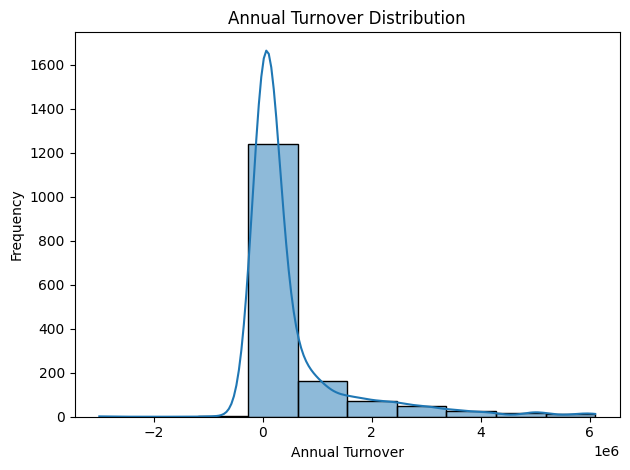

In [66]:
data = clean_data['Annual turnover']

sns.histplot(data, kde=True, bins=10)
plt.title("Annual Turnover Distribution")
plt.xlabel("Annual Turnover")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Most companies have an annual turnover of less than 1,000,000.

The distribution is right-skewed, indicating that there are a few companies with a very high annual turnover.
<br>


##### (c) (iv) Total Cost to Company (TCTC) distribution

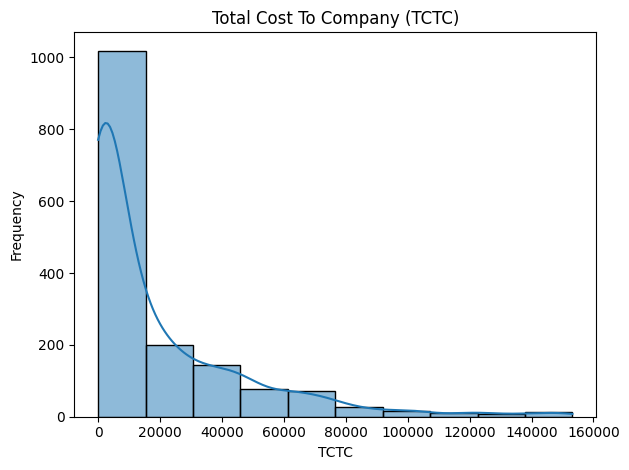

In [67]:
data = clean_data['TCTC']

sns.histplot(data, kde=True, bins=10)
plt.title("Total Cost To Company (TCTC)")
plt.xlabel("TCTC")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The Total Cost to Company (TCTC) for most companies is less than 20,000.

The distribution is right-skewed, indicating that there are a few companies with a very high TCTC.

<br>


##### (c) (v) Basic Salary distribution

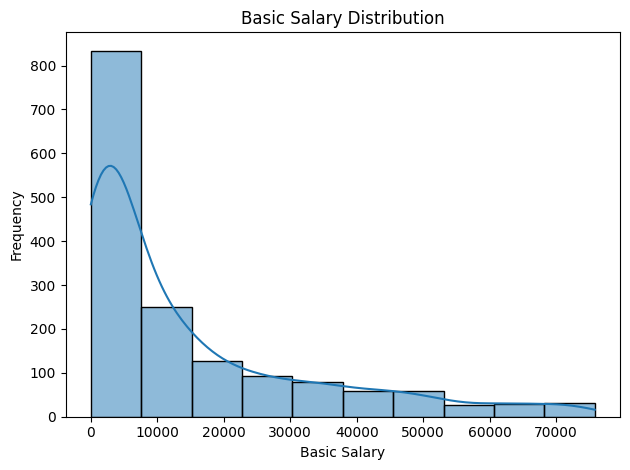

In [68]:
data = clean_data['Basic Salary']

sns.histplot(data, kde=True, bins=10)
plt.title("Basic Salary Distribution")
plt.xlabel("Basic Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Most companies have a basic salary of less than 20,000.

The distribution is right-skewed, indicating that there are a few companies with a very high basic salary.

<br>


##### (c) (vi) Cash Injection distribution

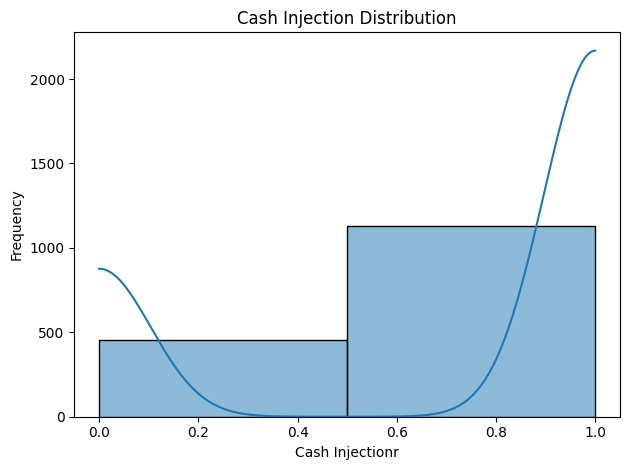

In [69]:
data = clean_data['Cash Injection']

sns.histplot(data, kde=True, bins=2)
plt.title("Cash Injection Distribution")
plt.xlabel("Cash Injectionr")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This is a binary variable where 1 means a cash injection has happened, and 0 means it hasn't.

This is a binary variable where 1 indicates that companies have cash injection, while "0" indicates that they do not have a cash injection.

<br>


##### (c) (vii) Contribution Waiver distribution

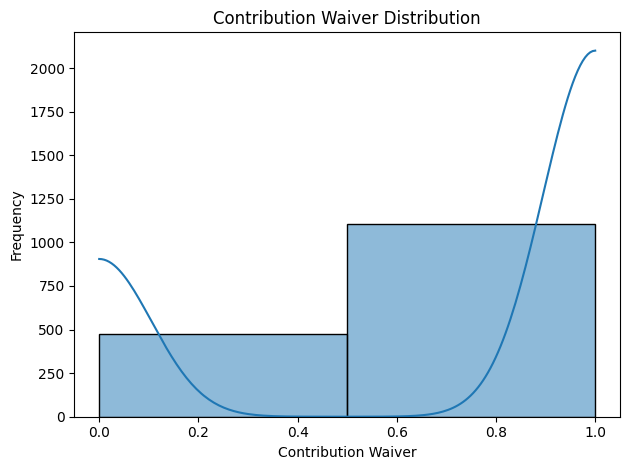

In [70]:
data = clean_data['Contrib Waiver']

sns.histplot(data, kde=True, bins=2)
plt.title("Contribution Waiver Distribution")
plt.xlabel("Contribution Waiver")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This is a binary variable where 1 indicates that companies have a contribution waiver, while "0" indicates that they do not have a contribution waiver.

This is a binary variable where 1 indicates that companies have a contribution waiver, while "0" indicates that they do not have a contribution waiver.

<br>


##### (c) (viii) Affected Employee distribution

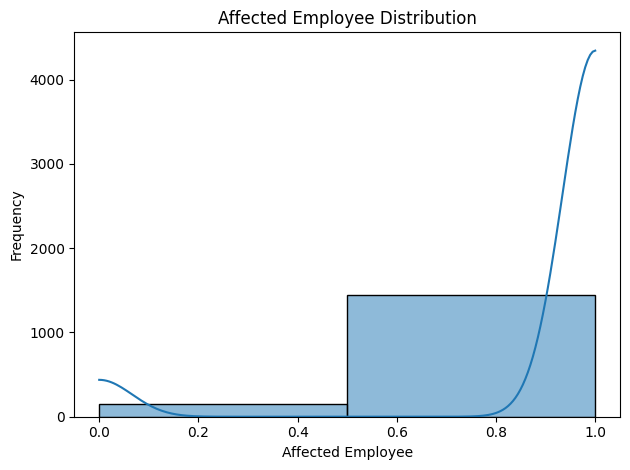

In [71]:
data = clean_data['Affected Employee']

sns.histplot(data, kde=True, bins=2)
plt.title("Affected Employee Distribution")
plt.xlabel("Affected Employee")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This is another binary variable, with 1 indicating that an employee has been affected and 0 indicating that they have not.

The histogram shows that most companies have had an affected employee (value of 1).

<br>


##### (c) (ix) Measuring correlations between the variables

Text(0.5, 1.0, 'Correlation matrix')

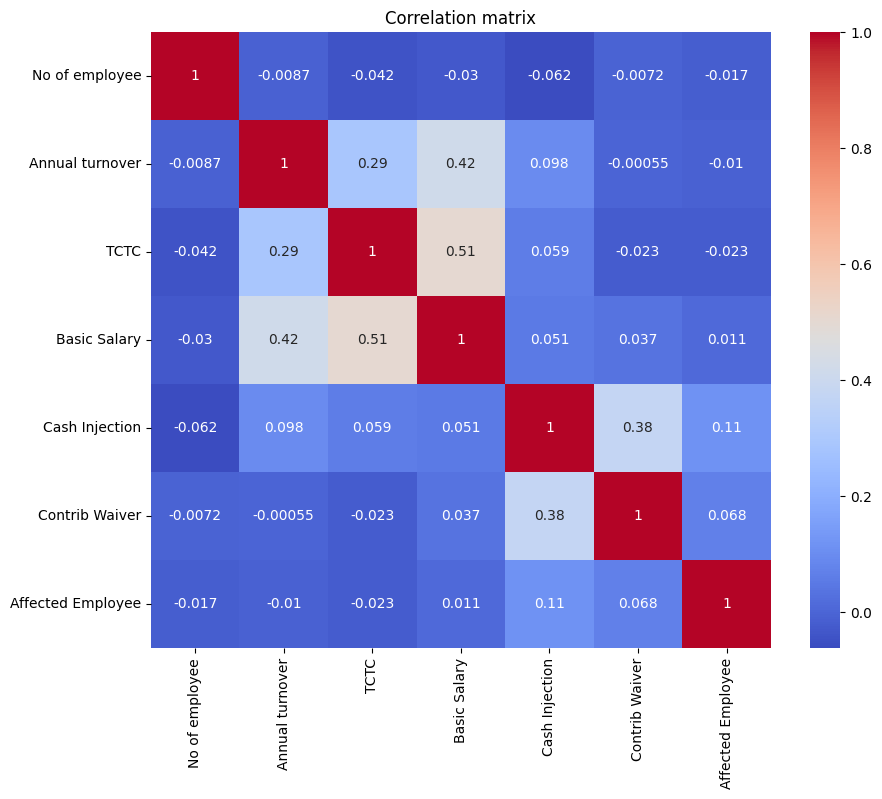

In [72]:
corr_matrix = clean_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')


**Employee-Turnover Correlation**
- There is a positive correlation between **No of employee** and **Annual turnover**.
- This suggests that companies with more employees tend to have higher annual turnover.

**Employee-TCTC and Basic Salary Correlation**
- There is also a positive correlation between **No of employee** and **TCTC**, **Basic Salary**.
- This suggests that companies with more employees tend to have higher **TCTC** and **Basic Salary**.

**Binary Variables Correlation**
- **Cash Injection**, **Contrib Waiver**, and **Affected Employee** are binary variables and do not show any clear correlation with other variables.

**TCTC-Basic Salary Correlation** 
- There is a positive correlation between **TCTC** and **Basic Salary**.
- This suggests that companies with higher TCTC tend to offer higher Basic Salary.

 Turnover-TCTC and Basic Salary Correlation: 
- There is no clear correlation between **Annual turnover** and **TCTC**, **Basic Salary**.
- This suggests that the annual turnover of a company does not necessarily depend on the **TCTC** or **Basic Salary**.

**Cash Injection, Contrib Waiver, and Affected Employee Correlation**
- There is no clear correlation between **Cash Injection**, **Contrib Waiver**, and **Affected Employee**.
- This suggests that these variables do not have a significant influence on each other.

<br>
<br>

#### (d) Machine Learning

##### (d) (i) Predicting company performance using random forest model

In [73]:
X = clean_data[['No of employee', 'TCTC', 'Basic Salary']]

# the threshold value for annual turnover to define "doing well" (1) or "not doing well" (0)
threshold = 1000000

y = (clean_data['Annual turnover'] > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the features to ensure that they are on a consistent scale, helping improve the performance and stability of machine learning models.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### (d) (ii) Testing and prediction

In [74]:
# Training the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

<br>
<br>

#### (e) Evaluation of Machine Learning

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


<br>
<br>

#### (f) Presentation of Results

In [76]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8109243697478992
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       397
           1       0.39      0.24      0.30        79

    accuracy                           0.81       476
   macro avg       0.62      0.58      0.59       476
weighted avg       0.78      0.81      0.79       476



**Key Findings:**
* The model achieves 81% accuracy in predicting company performances.
* It performs well in identifying companies not doing well but struggles with those doing well.

**Recommendations:**
* Work on class imbalance.
* Explore feature engineering.
* Tune the model or consider different algorithms.

<br>
<br>

#### Confusion Matrix

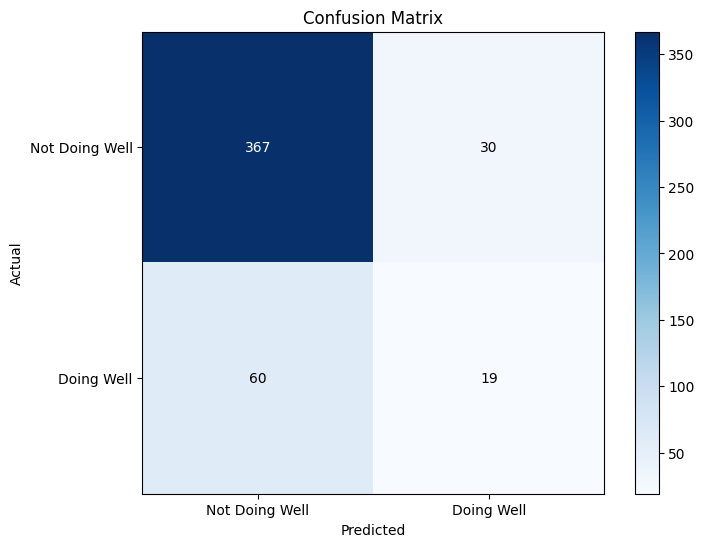

In [77]:
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Not Doing Well', 'Doing Well']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white' if confusion[i, j] > confusion.max() / 2 else 'black')

plt.show()


Insights from it ................

<br>
<br>

#### Calculate ROC curve and AUC

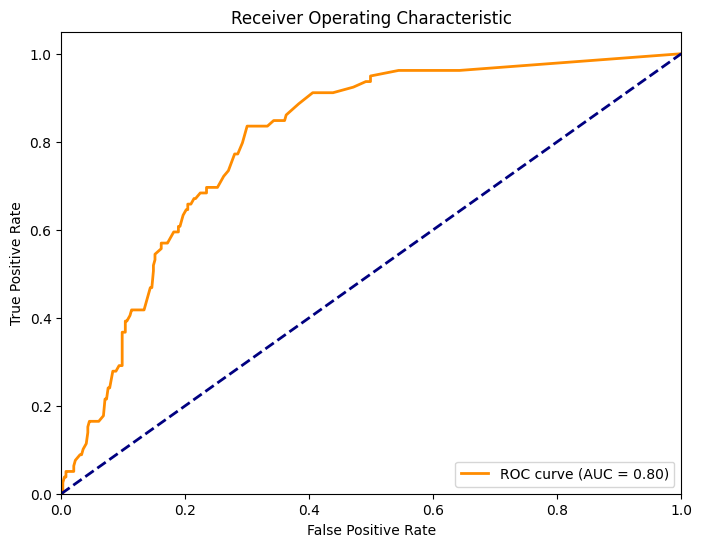

In [78]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Insight from it ................

<br>
<br>

#### Testing on unseen data

In [79]:
# Define the new data
new_data = pd.DataFrame({
    'No of employee': [11],
    'TCTC': [50000],
    'Basic Salary': [40000]
})

# Standardize the new data using the same scaler used for training
new_data = scaler.transform(new_data)

# Make predictions for the new data point
prediction = model.predict(new_data)

# Interpret the prediction
if prediction[0] == 1:
    print("The company is predicted to be doing well.")
else:
    print("The company is predicted to not be doing well.")
    


The company is predicted to be doing well.
